# Task 4.9 Intro to Data Visualization with Python PART 2

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating a path
path = r'/Users/ColinLynt/11-2021 Instacart Basket Analysis'

In [3]:
# Importing db_merge
db_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'db_merge.pkl'))

In [10]:
# Checking the data
db_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,Last Name,Gender,State,Age,Date Joined,n_dependants,Marital Status,Income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [8]:
# Changing the name of order_day_of_week to orders_day_of_the_week
db_merge.rename(columns = {'order_day_of_week' : 'orders_day_of_the_week'}, inplace = True)

### Question 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

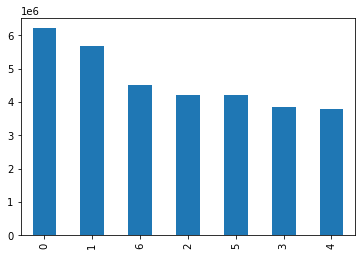

In [38]:
# Creating plot bar
bar_1 = db_merge['orders_day_of_the_week'].value_counts().plot.bar()

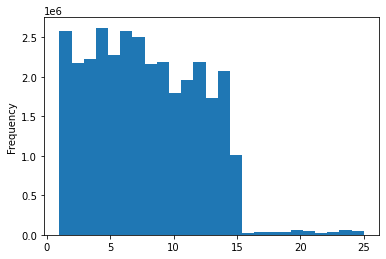

In [41]:
# Creating a Histogram
histogram_1 = db_merge['prices'].plot.hist(bins = 25)

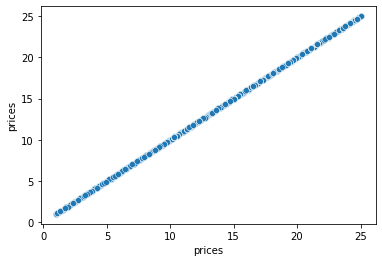

In [42]:
# Creating a Scatterplot
scatterplot_1 = sns.scatterplot(x = 'prices', y = 'prices',data = db_merge)

In [14]:
# Generating random sampling data
np.random.seed(4)
dev = np.random.rand(len(db_merge)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
np.random.rand(10)

array([0.68849051, 0.62169821, 0.4657069 , 0.65638038, 0.91109683,
       0.24356319, 0.36430584, 0.5420109 , 0.72603874, 0.29324335])

In [17]:
# Spliting into two samples, Big is 70% of data, Small is 30% of data
big = db_merge[dev]
small = db_merge[~dev]

In [18]:
# Checking the total number of rows
len(db_merge)

32436241

In [19]:
# Checking the total number of rows combined
len(big) + len(small)

32436241

In [20]:
# Making a new dataframe df_2 only with two conditions
df_2 = small[['orders_day_of_the_week','prices']]

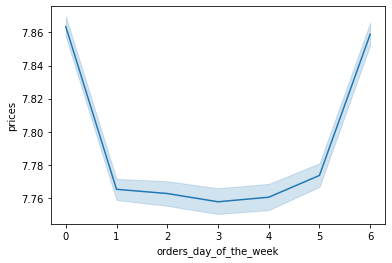

In [21]:
# Creating a line chart with sample data
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices')

### Question 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
#### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

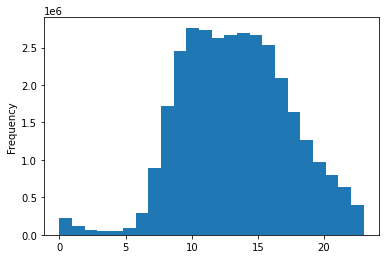

In [43]:
# Creating a Histogram
histogram_2 = db_merge['order_hour_of_day'].plot.hist(bins = 24)

#### ANSWER: The highest peak during the day is at 9 Am, while the lowest peak is at 3-4 Am. The frequency of orders starts to decrease at 5 Pm and doesn't pick back up until 6 Am.

### Question 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

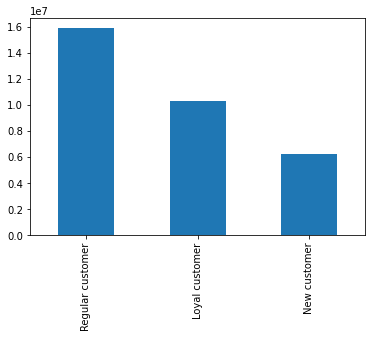

In [44]:
# Creating plot bar
bar_2 = db_merge['loyalty_flag'].value_counts().plot.bar()

### Question 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [30]:
# Making a new dataframe df_3 only with two conditions
df_3 = small[['order_hour_of_day','prices']]

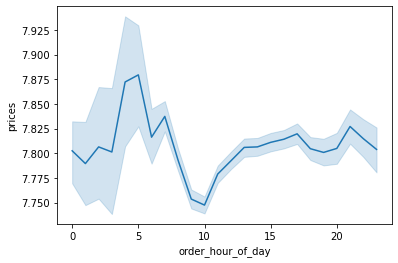

In [31]:
# Creating a line chart
line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

#### ANSWER: I had to use a sample of the data as the original data would have been too large to run for my computer. Interestingly the prices are increased during slower hours and decrease during peak hours.

### Question 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
#### In a markdown cell beneath your line chart, describe what the line chart shows.

In [34]:
# Making a new dataframe df_4 only with two conditions
df_4 = db_merge[['Age', 'n_dependants']]

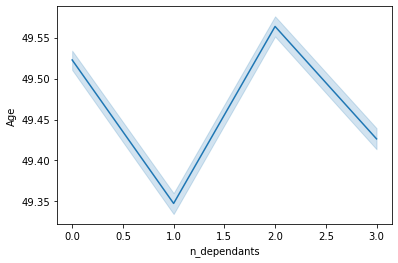

In [35]:
# Creating a line chart
line_3 = sns.lineplot(data = df_4, x = 'n_dependants', y = 'Age')

#### ANSWER:It seems the majority of patrons either fall into one of two categories. Customers either claim no dependents or claim at least two, with an average amount of customers claiming at most three dependents.

#### It seems if we're trying to target families, it would be in our best interest to target families of two at the age of 50. Otherwise, it would be best to advertise to 49-year-olds with three kids. Lastly, if we were to try and market towards the younger generations, we should advertise with no kids in mind.

### Question 7. You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
#### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

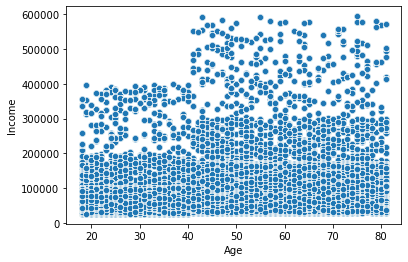

In [45]:
# Creating a Scatterplot
scatterplot_2 = sns.scatterplot(x = 'Age', y = 'Income',data = db_merge)

#### ANSWER: At first glance, you wouldn't assume there is any correlation here. However, anyone under the age of 40 doesn't make over 400,000, while anyone over the age of 40 has the possibility to makeover 400,000. Therefore there is a slight positive correlation between age and income.
#### The Scatterplot also paints a very clear picture that the average annual income of most customers is below 200,000 and almost majority of our customers would fall into this income braket. 

### Question 8. Export your visualizations as “.png” files in your relevant project folder.

In [47]:
# Exporting Bar chart
bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_day_of_week_bar.png'))

In [48]:
# Exporting Histogram
histogram_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_hist.png'))

In [49]:
# Exporting Scatterplot
scatterplot_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_scatterplot.png'))

In [50]:
# Exporting line
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_of_week_prices_line.png'))

In [51]:
# Exporting Histogram
histogram_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_of_day_hist.png'))

In [52]:
# Exporting Bar chart
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

In [53]:
# Exporting line
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hour_of_day_prices_line.png'))

In [54]:
# Exporting line
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_age_line.png'))

In [55]:
# Exporting Scatterplot
scatterplot_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatterplot.png'))